In [1]:
import requests
import os

# date range to identify
start='2012-01-01'
end='2013-01-01'

# create a filename that reflects the date range
expert_filename = 'experts_{}_{}.csv'.format(start, end)

# check if the file already exists-- if not, request the file
if not os.path.exists(expert_filename):
    # create a query that matches the data
    query="http://serengeti.wfunet.wfu.edu/consensus/api/v3/?start={}&end={}&database=expert&method=CSV".format(start,end)
    # note, this request can potentially timeout, so if an error occurs, try it again.
    print('requesting data from')
    expert_data = requests.get(query)
    
    # write it back to a file
    with open(expert_filename, 'w') as fh:
        fh.write(expert_data.text)

In [2]:
# get all the identifications we loaded above
import pandas as pd
df = pd.read_csv(expert_filename)
# print the tail to demonstrate we got all the data up to the end
df.tail()

,ID,CaptureEventID,Species,NumImages,DateTime,SiteID,LocationX,LocationY,NumSpecies,Count,...,Eating,Interacting,Babies,NumClassifications,NumVotes,NumBlanks,Evenness,expert identified,created,modified
161879,309765,ASG000ygu7,hippopotamus,1,2012-12-31T22:53:49,D03,699427,9731593,1,2,...,0.937500,0.0,0.3125,16,16,0,0.000000,False,2016-10-31T07:44:28.023000,2016-10-31T07:44:28.023000
161880,309766,ASG000ygu8,hippopotamus,1,2012-12-31T22:55:03,D03,699427,9731593,1,2,...,0.906250,0.0,0.2500,33,32,1,0.000000,False,2016-10-31T07:44:28.029000,2016-10-31T07:44:28.029000
161881,318727,ASG000ztne,hartebeest,1,2012-12-31T23:00:34,J05,713133,9727041,1,2,...,0.000000,0.0,0.0000,17,13,0,0.541668,False,2016-10-31T07:45:26.749000,2016-10-31T07:45:26.749000
161882,328920,ASG0011k7i,zebra,1,2012-12-31T23:35:01,T08,735260,9720293,1,4,...,0.062500,0.0,0.0000,18,16,2,0.000000,False,2016-10-31T07:46:32.768000,2016-10-31T07:46:32.768000
161883,303918,ASG000y0qu,impala,1,2012-12-31T23:35:47,B05,694892,9727162,1,1,...,0.769231,0.0,0.0000,18,13,0,0.616612,True,2016-10-31T07:43:49.124000,2017-04-05T14:40:20.080986


In [3]:
# separate the impala data
sdf = df[df.Species=='impala']

In [4]:
# demonstrate species column matches
sdf.head()

,ID,CaptureEventID,Species,NumImages,DateTime,SiteID,LocationX,LocationY,NumSpecies,Count,...,Eating,Interacting,Babies,NumClassifications,NumVotes,NumBlanks,Evenness,expert identified,created,modified
2,172670,ASG000dvuk,impala,3,2012-01-01T06:35:07,H02,708420,9733771,1,2,...,0.071429,0.0,0.0,19,14,4,0.353359,True,2016-10-31T07:29:07.146000,2016-10-31T11:08:23.817000
3,172671,ASG000dvtn,impala,3,2012-01-01T06:37:40,H02,708420,9733771,1,1,...,0.440000,0.0,0.0,29,25,2,0.287086,True,2016-10-31T07:29:07.153000,2016-10-31T11:08:23.982000
10,172599,ASG000eus8,impala,3,2012-01-01T07:56:06,H01,708572,9736024,1,1,...,0.722222,0.0,0.0,29,18,1,0.676711,True,2016-10-31T07:29:06.701000,2016-10-31T11:08:24.128000
12,172600,ASG000eut7,impala,3,2012-01-01T07:57:24,H01,708572,9736024,1,1,...,0.000000,0.0,0.0,23,15,0,0.710515,True,2016-10-31T07:29:06.707000,2016-10-31T11:08:24.276000
14,172601,ASG000euty,impala,3,2012-01-01T07:58:43,H01,708572,9736024,1,3,...,0.500000,0.0,0.0,33,22,1,0.628766,True,2016-10-31T07:29:06.713000,2016-10-31T11:08:24.423000


In [5]:
# how many of the Species identified by citizen scientists
sdf['ID'].count()

4955

In [7]:
# how many were identified by WFU experts
sdf[sdf['expert identified']==True]['expert identified'].count()

4954

In [34]:
# create a generalized species identifier count
def species_ident_data(expert_filename, species):
    # get all the identifications we loaded above
    import pandas as pd
    df = pd.read_csv(expert_filename)
    df = df[df.Species==species]
    total_consensus_observations = df['ID'].count()
    expert_identified = df[df['expert identified']==True]['expert identified'].count()
    return species, total_consensus_observations, expert_identified, expert_identified/float(total_consensus_observations)

In [35]:
species_ident_data(expert_filename, 'impala')

('impala', 4955, 4954, 0.9997981836528759)

In [36]:
species_ident_data(expert_filename, 'gazelleGrants')

('gazelleGrants', 2863, 2821, 0.9853300733496333)

In [37]:
species_ident_data(expert_filename, 'gazelleThomsons')

('gazelleThomsons', 15986, 1875, 0.11729012886275492)

In [38]:
species_ident_data(expert_filename, 'hartebeest')

('hartebeest', 6728, 0, 0.0)

In [39]:
species_ident_data(expert_filename, 'topi')

('topi', 953, 458, 0.4805876180482686)

In [40]:
data = []
for species in ['gazelleGrants', 'gazelleThomsons', 'hartebeest', 'impala', 'topi']:
    data.append(species_ident_data(expert_filename, species))

In [41]:
data

[('gazelleGrants', 2863, 2821, 0.9853300733496333),
 ('gazelleThomsons', 15986, 1875, 0.11729012886275492),
 ('hartebeest', 6728, 0, 0.0),
 ('impala', 4955, 4954, 0.9997981836528759),
 ('topi', 953, 458, 0.4805876180482686)]

In [42]:
sdf = pd.DataFrame(data)

In [46]:
sdf.columns = ['species','count','expert','pct']
sdf

,species,count,expert,pct
0,gazelleGrants,2863,2821,0.985330
1,gazelleThomsons,15986,1875,0.117290
2,hartebeest,6728,0,0.000000
3,impala,4955,4954,0.999798
4,topi,953,458,0.480588


AttributeError: Unknown property xlabel

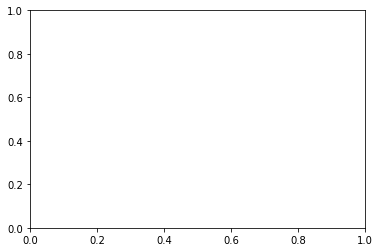

In [51]:
sdf.drop('pct',axis=1).set_index('species').plot.bar()